# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [10]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [3]:
!git clone https://github.com/dnanhkhoa/nb_black.git

Cloning into 'nb_black'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 106 (delta 43), reused 38 (delta 38), pack-reused 55
Receiving objects: 100% (106/106), 21.99 KiB | 10.99 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [5]:
!ls

nb_black  sample_data


In [6]:
!pwd

/content


In [8]:
!pip install /content/nb_black --user

Processing ./nb_black
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.1 MB/s eta 0:00:00
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5345 sha256=4da3c7502db65ffcfee3607e08d5069b76634f196140db6760316196b6593162
  Stored in directory: /tmp/pip-ephem-wheel-cache-8an2eibo/wheels/87/b0/84/d7bf5f338e8fc8f166558bf7e881ada0db11530ff480e24ef8
Successfully built nb-black
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
!echo 'export PATH="/root/.local/bin:$PATH"' >> ~/.bashrc

In [10]:
%load ~/.bashrc

In [11]:
!echo $PATH

/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


In [14]:
!pip install --upgrade jupyter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 4.7 MB/s eta 0:00:00


In [15]:
!pip uninstall nb_black

Found existing installation: nb-black 1.0.7
Uninstalling nb-black-1.0.7:
  Would remove:
    /root/.local/lib/python3.10/site-packages/lab_black.py
    /root/.local/lib/python3.10/site-packages/nb_black-1.0.7.dist-info/*
    /root/.local/lib/python3.10/site-packages/nb_black.py
Proceed (Y/n)? Y
  Successfully uninstalled nb-black-1.0.7


In [17]:
!pip install /content/nb_black --user

Processing ./nb_black
  Preparing metadata (setup.py) ... done
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5345 sha256=878947fd5809dae1dc54b309987e6d9e858c6c039baa159bf6c88b41953179d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-1zq9rs6m/wheels/87/b0/84/d7bf5f338e8fc8f166558bf7e881ada0db11530ff480e24ef8
Successfully built nb-black


In [18]:
%load ~/.bashrc

In [3]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Load the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<IPython.core.display.Javascript object>

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Python Course/Supervised Learning _ Foundations/Week 1 _ Intro to Supervised Learning _ Linear Regression/Week 1 _ Practice Exercise/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


<IPython.core.display.Javascript object>

**Check the shape of the dataset**

In [6]:
df.shape

(506, 13)

<IPython.core.display.Javascript object>

**Get the info regarding column datatypes**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


<IPython.core.display.Javascript object>

**Get summary statistics for the numerical columns**

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<IPython.core.display.Javascript object>

**For the column `CHAS`, replace the 1 values with '*yes*' and 0 values with '*no*'.**

In [9]:
df["CHAS"] = df["CHAS"].replace({1: "yes", 0: "no"})
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,no,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,no,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,no,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,no,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,no,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


<IPython.core.display.Javascript object>

### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

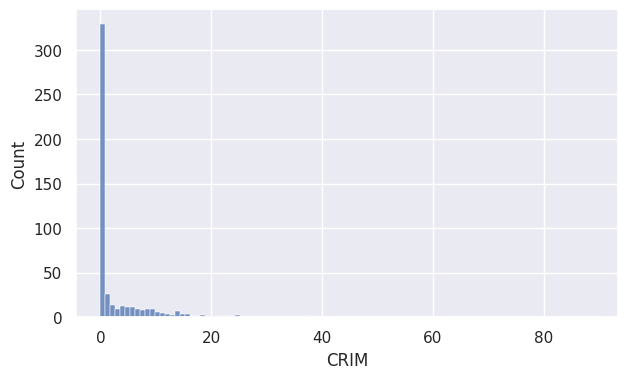

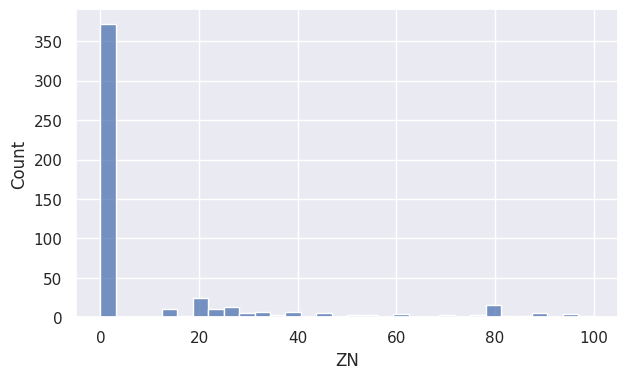

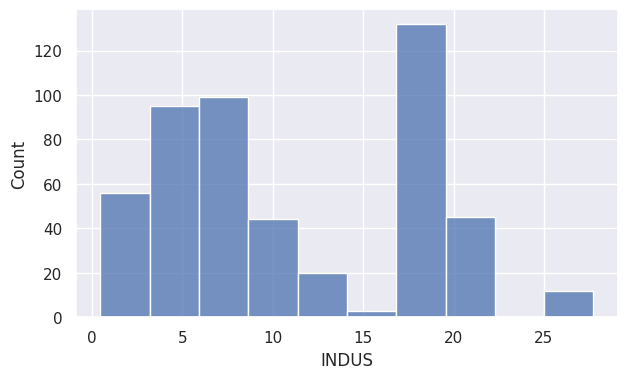

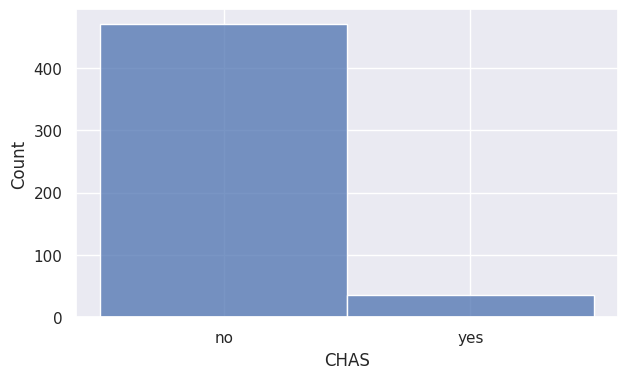

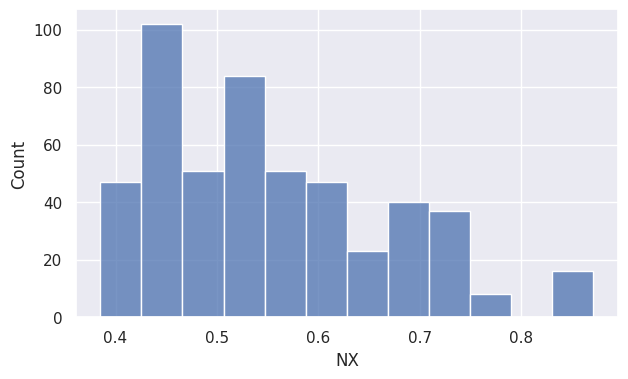

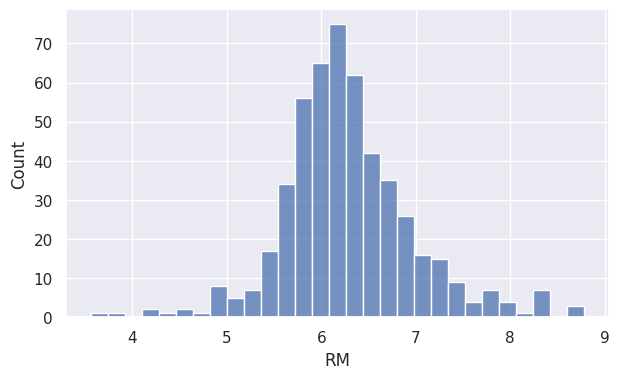

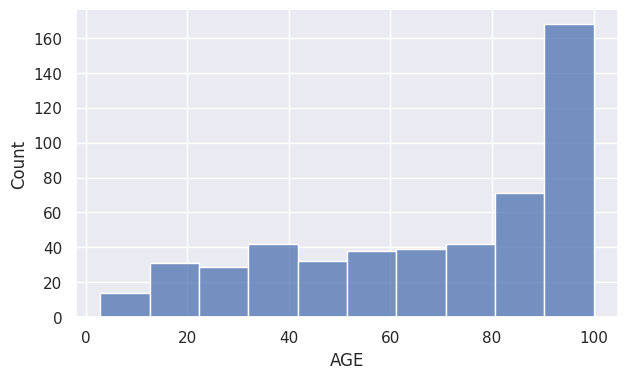

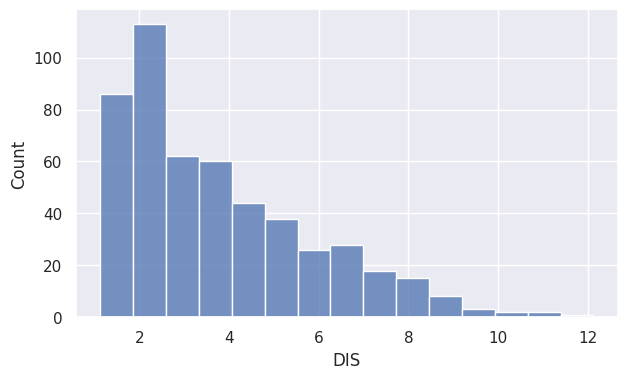

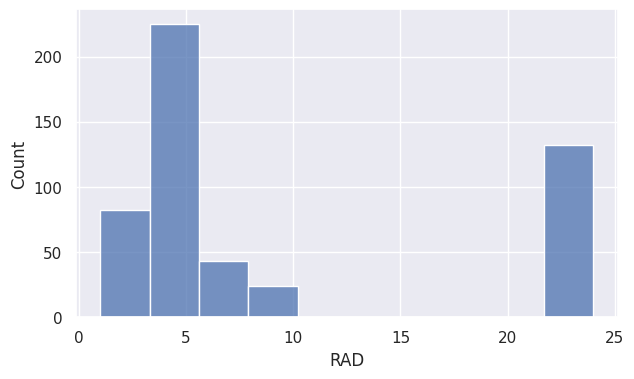

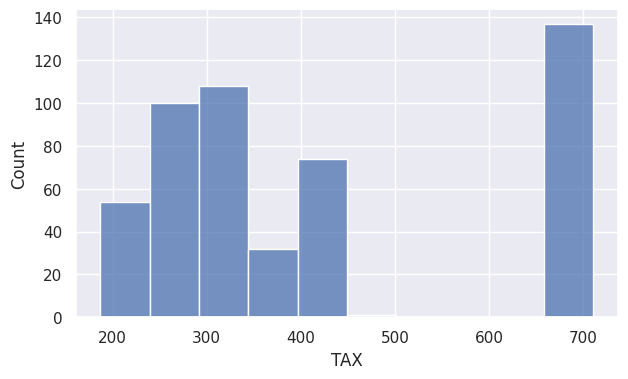

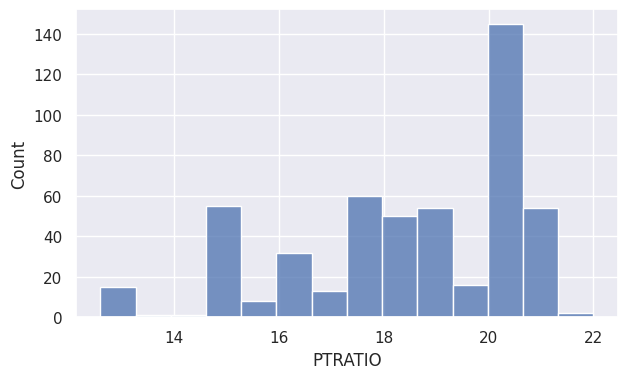

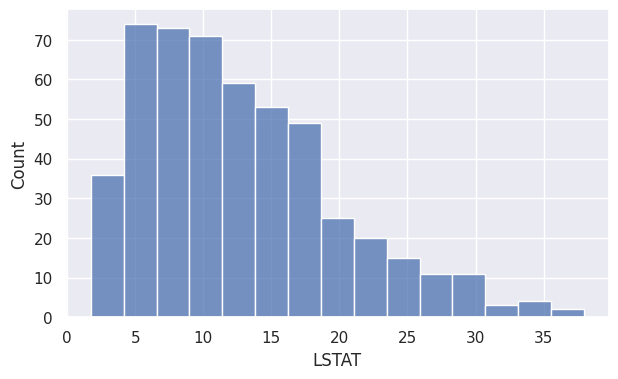

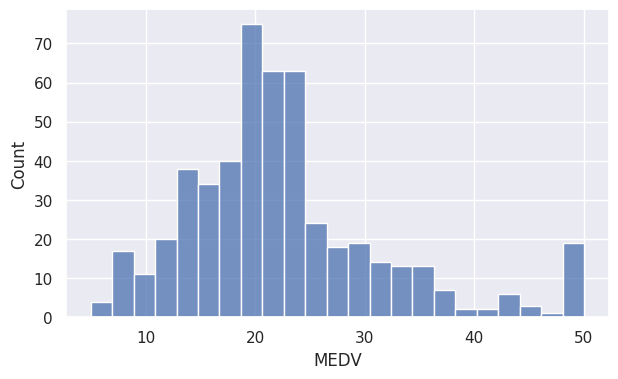

<IPython.core.display.Javascript object>

In [10]:
# let's plot all the columns to look at their distributions

import seaborn as sns

for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i)
    plt.show()

* CRIM and ZN have heavily skewed distributions.
* RM and MEDV have close to normal distributions.

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

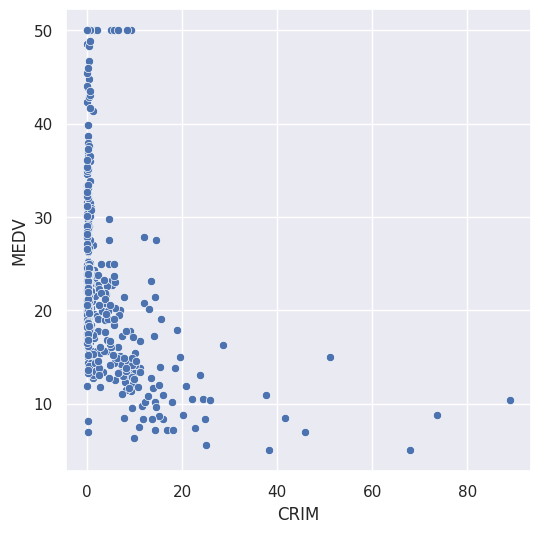

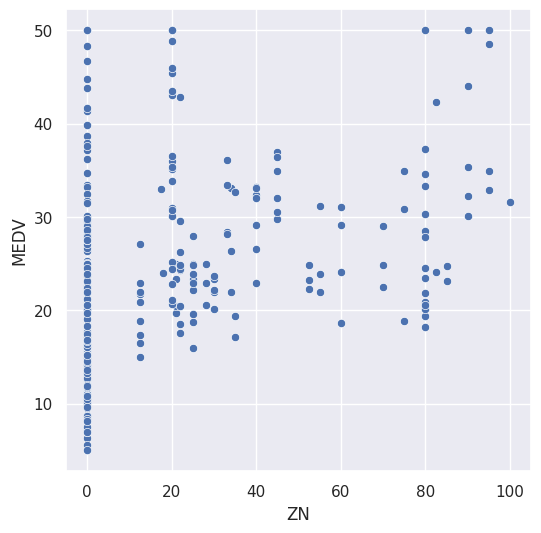

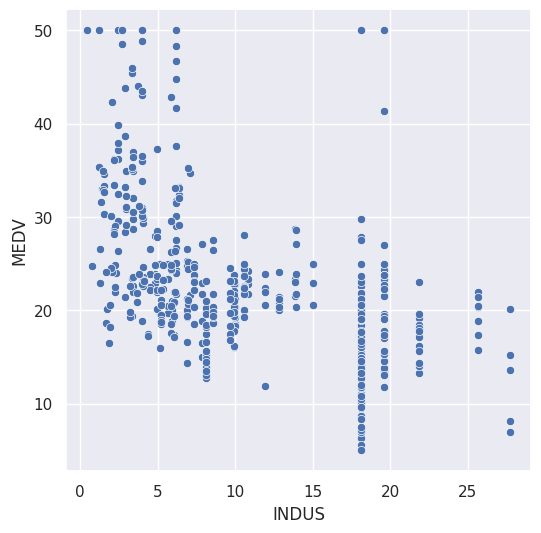

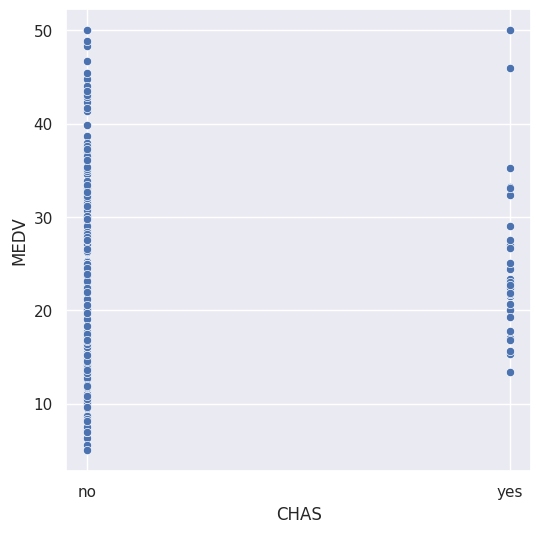

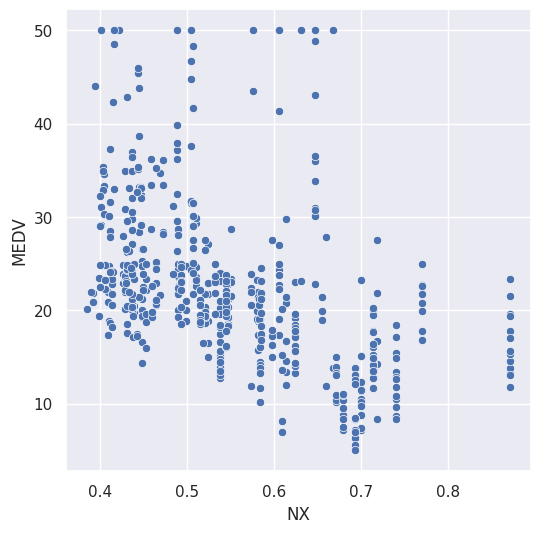

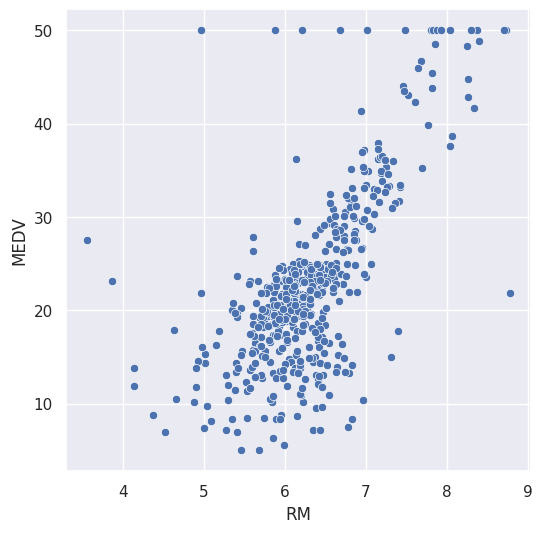

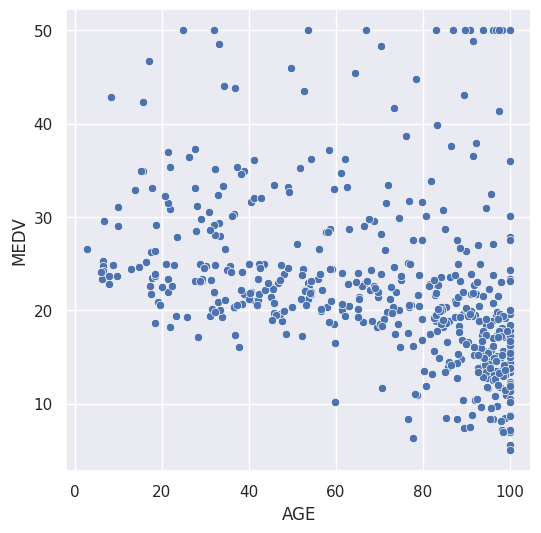

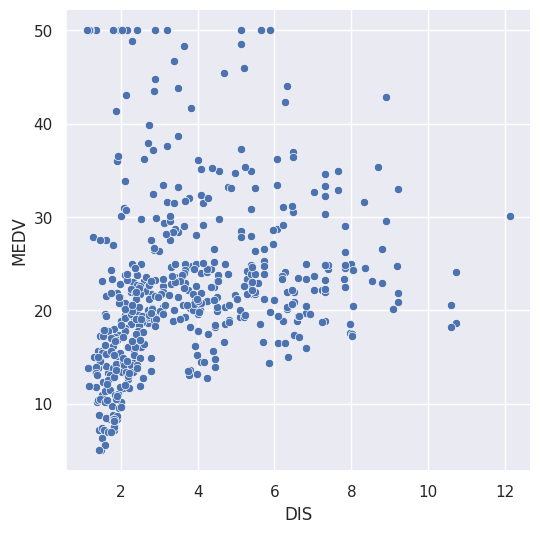

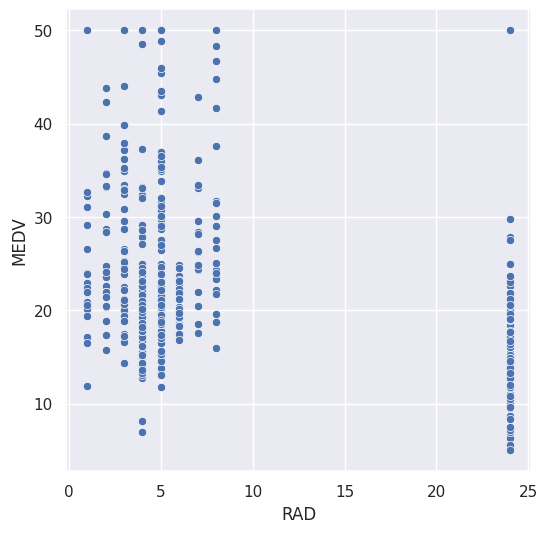

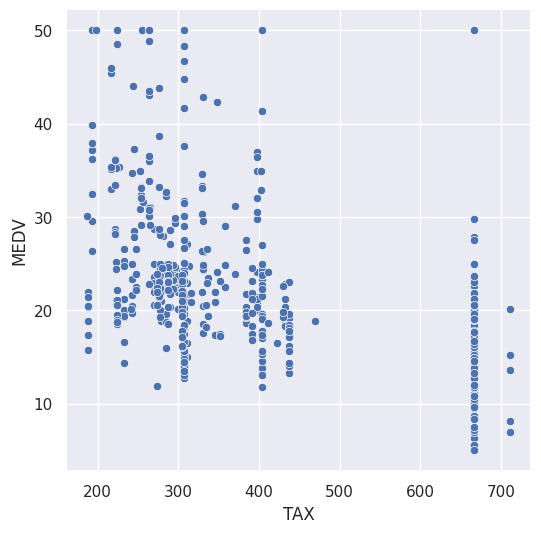

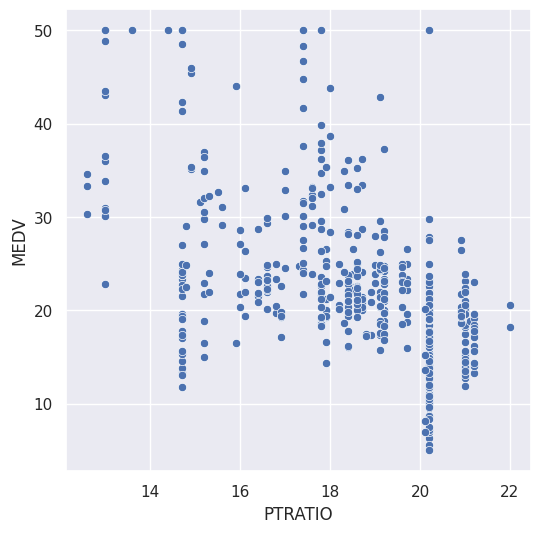

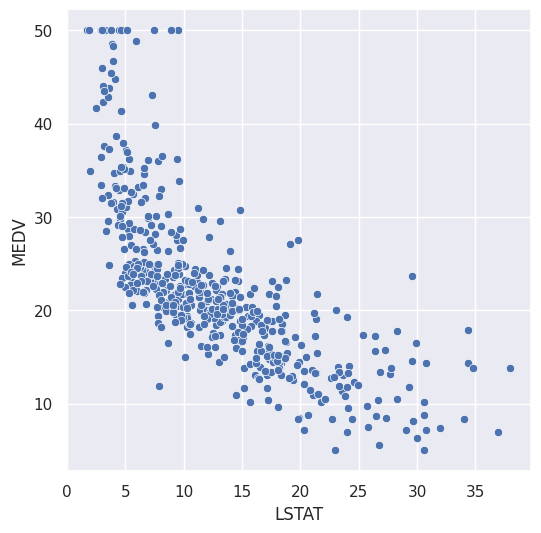

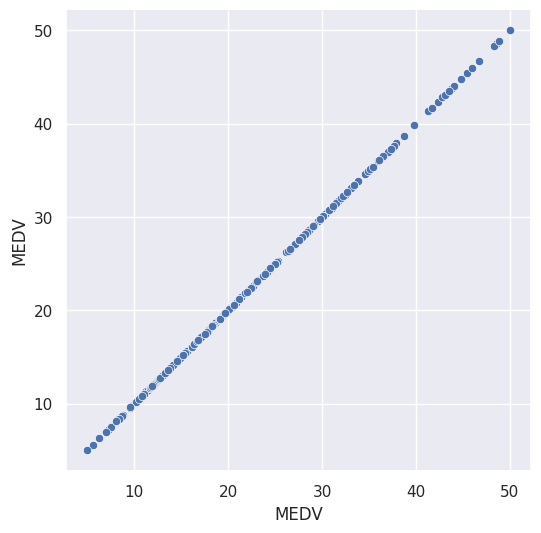

<IPython.core.display.Javascript object>

In [11]:
# let's plot the scatterplots of median price with all the features

for i in df.columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=df, x=i, y="MEDV")
    plt.show()

* LSTAT and RM show a slightly strong linear relationship with MEDV.

**Plot the correlation heatmap and list your observations.**

<ipython-input-12-d207b7d46160>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


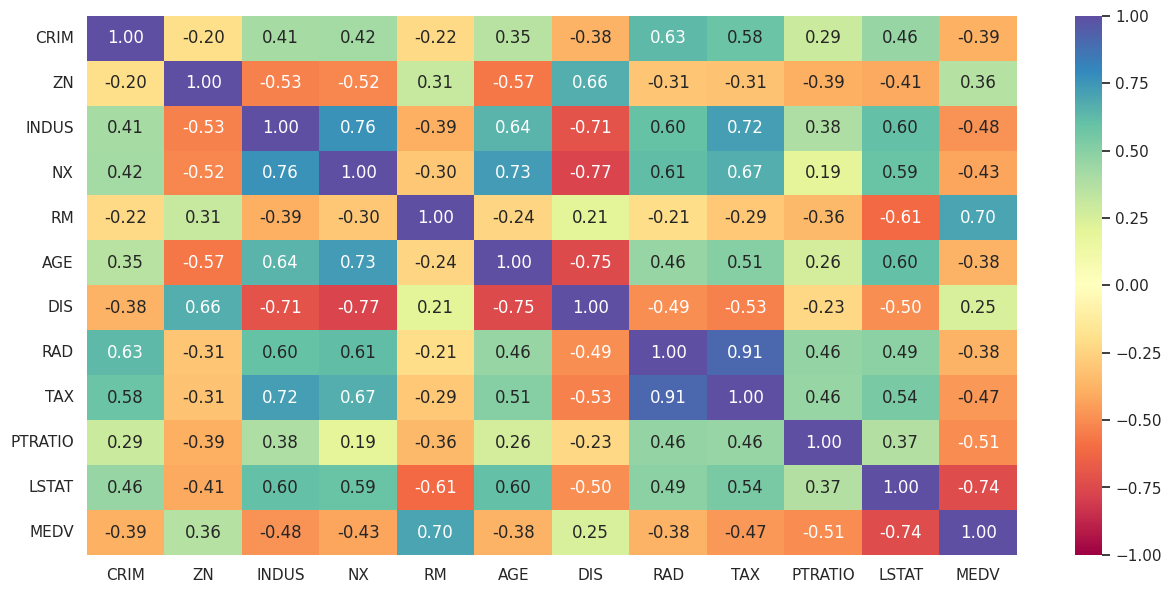

<IPython.core.display.Javascript object>

In [12]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* NX and TAX show a slightly strong positive linear relationship with INDUS, while DIS shows a slightly strong negative linear relationship with INDUS.
* NX shows a slightly strong positive linear relationship with AGE, while DIS shows a slightly strong negative linear relationship with AGE.
* RM shows a slightly strong positive linear relationship with MEDV, while LSTAT shows a slightly strong negative linear relationship with MEDV.

### Split the dataset

Split the data into the dependent and independent variables, create dummy variables for the categorical variables, add a constant to the independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [13]:
# splitting the data into the dependent and independent variables
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

<IPython.core.display.Javascript object>

In [14]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CHAS_yes
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,0


<IPython.core.display.Javascript object>

In [15]:
# this adds the constant term to the dataset
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [16]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

### Model Building

**Make the linear model using statsmodels OLS and print the model summary.**

In [17]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     68.69
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.38e-83
Time:                        07:47:55   Log-Likelihood:                -1063.0
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     341   BIC:                             2202.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8852      6.107      8.168      0.0

<IPython.core.display.Javascript object>

**Get the value of the coefficient of determination.**

In [18]:
print("The coefficient of determination (R-squared) is ", model.rsquared)

The coefficient of determination (R-squared) is  0.7073732058856179


<IPython.core.display.Javascript object>

**Get the predictions on test set**

In [19]:
y_pred = model.predict(X_test)
y_pred.head()

307    32.401501
343    27.887341
47     17.737617
67     21.686439
362    18.642772
dtype: float64

<IPython.core.display.Javascript object>

**Calculate MSE for training set**

In [20]:
print(
    "The Mean Square Error (MSE) of the model for the training set is ",
    mean_squared_error(y_train, model.predict(X_train)),
)

The Mean Square Error (MSE) of the model for the training set is  23.758095295443866


<IPython.core.display.Javascript object>

In [21]:
# we can also get the MSE by the mse_resid parameter of model
# note that the value will differ slightly due to the consideration of degrees of freedom

print(
    "The Mean Square Error (MSE) of the model for the training set is ", model.mse_resid
)

The Mean Square Error (MSE) of the model for the training set is  24.6638291336866


<IPython.core.display.Javascript object>

**Calculate MSE for test set**

In [22]:
print(
    "The Mean Square Error (MSE) of the model for the test set is ",
    mean_squared_error(y_test, model.predict(X_test)),
)

The Mean Square Error (MSE) of the model for the test set is  20.88178020261418


<IPython.core.display.Javascript object>

**Get the RMSE on training set**

In [23]:
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, model.predict(X_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  4.874227661429436


<IPython.core.display.Javascript object>

In [24]:
# we can also get the RMSE by the mse_resid parameter of model
# note that the value will differ slightly due to the consideration of degrees of freedom

print(
    "The Mean Square Error (MSE) of the model for the training set is ",
    np.sqrt(model.mse_resid),
)

The Mean Square Error (MSE) of the model for the training set is  4.96626913625174


<IPython.core.display.Javascript object>

**Get the RMSE on test set**

In [25]:
print(
    "The Root Mean Square Error (RMSE) of the model for the test set is ",
    np.sqrt(mean_squared_error(y_test, model.predict(X_test))),
)

The Root Mean Square Error (RMSE) of the model for the test set is  4.569658652745758


<IPython.core.display.Javascript object>

**Automate the equation of fit**

In [26]:
# Let us write the equation of linear regression
Equation = "Price ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(model.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            "(",
            model.params[i],
            ")*(",
            X_train.columns[i],
            ")",
            "+",
            end=" ",
        )
    else:
        print("(", model.params[i], ")*(", X_train.columns[i], ")")

Price = 49.885234663817634 + ( -0.11384484836913318 )*( CRIM ) + ( 0.06117026804059738 )*( ZN ) + ( 0.054103464958748806 )*( INDUS ) + ( -22.24850234508426 )*( NX ) + ( 2.6984128200099224 )*( RM ) + ( 0.004836047284747764 )*( AGE ) + ( -1.5342953819992027 )*( DIS ) + ( 0.29883325485900336 )*( RAD ) + ( -0.011413580552025546 )*( TAX ) + ( -0.9889146257039589 )*( PTRATIO ) + ( -0.5861328508499224 )*( LSTAT ) + ( 2.517511959122701 )*( CHAS_yes )


<IPython.core.display.Javascript object>